**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

**Load the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Prodigy InfoTech/bank.csv/bank.csv',delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.rename(columns={'y':'deposit'}, inplace=True)

**Exploration the Data Analysis (EDA)**

In [ ]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.shape

(4521, 17)

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
df.dtypes.value_counts()

,count
object,10
int64,7


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
print(num_cols)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


Text(0.5, 1.0, 'Various Aspects of Dataset')

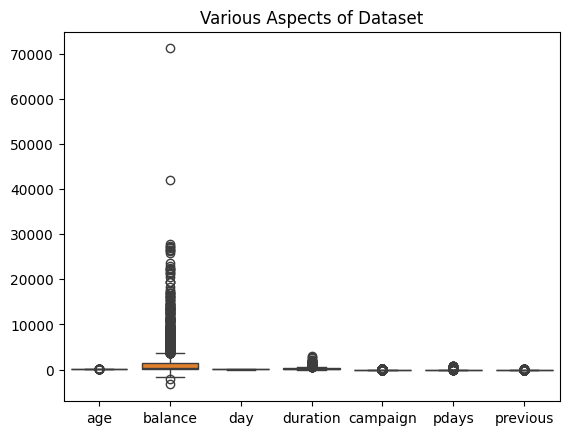

In [ ]:
sns.boxplot(data=df)
plt.title('Various Aspects of Dataset')

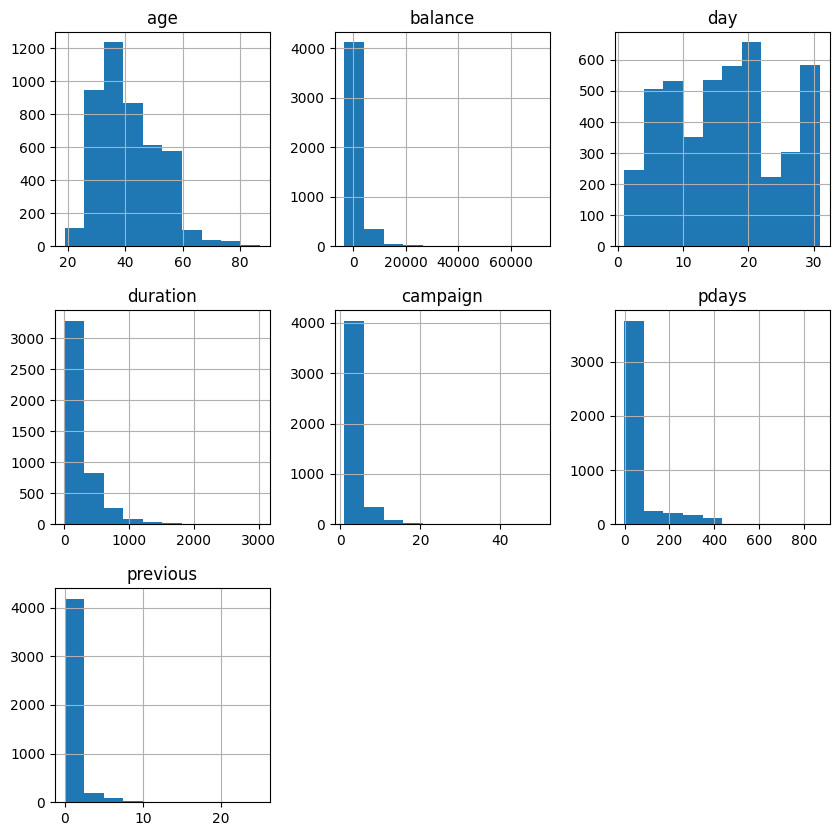

In [ ]:
df.hist(figsize=(10,10))
plt.show()

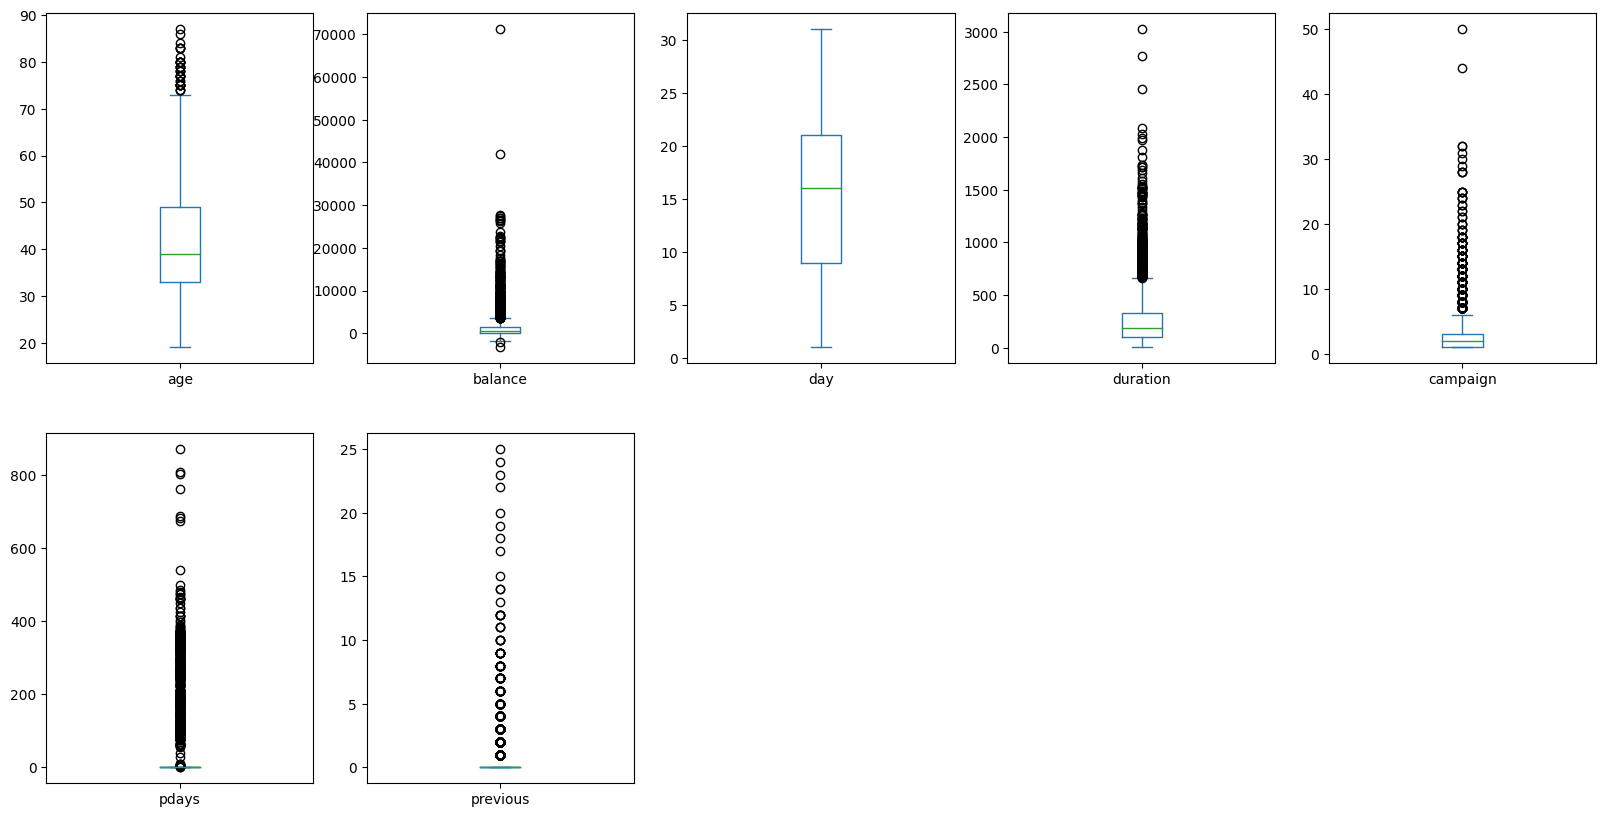

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10))
plt.show()

<ipython-input-24-a4935f9b54d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, bins=100)


<Axes: xlabel='age', ylabel='Density'>

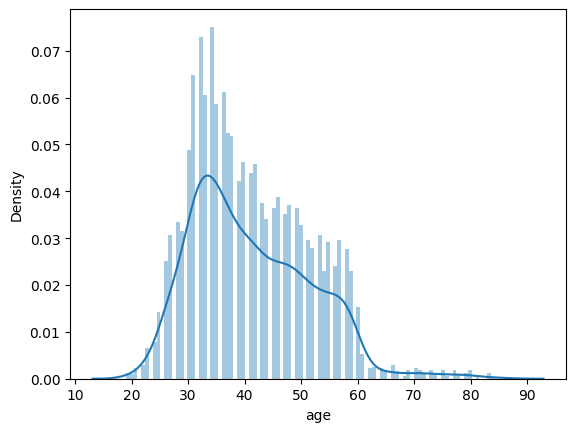

In [ ]:
sns.distplot(df.age, bins=100)

In [ ]:
numeric_df = df.drop(columns=cat_cols)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000


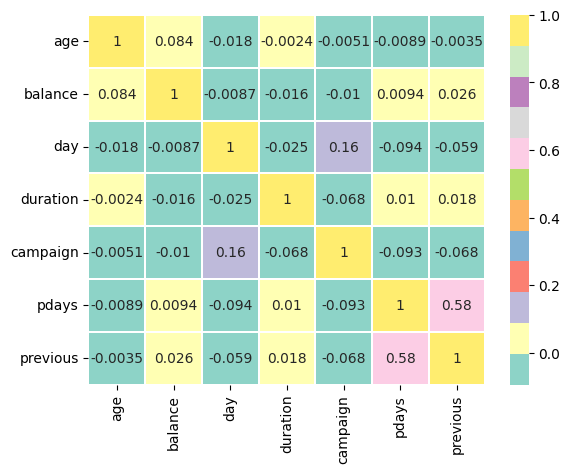

In [ ]:
# Compute the correlation matrix
corr = numeric_df.corr()

# Print the correlation matrix
print(corr)

# Filter correlations with absolute value >= 0.90
#corr = corr[abs(corr) >= 0.50]

sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.1)
plt.show()

In [ ]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
df.drop('month', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)
df.drop('pdays', axis=1, inplace=True)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,5,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,151,11,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,4,3,other,no


In [ ]:
df['housing'].value_counts()

,count
housing,
yes,2559
no,1962


In [ ]:
df['housing']=df['housing'].map({'yes':1,'no':0})
df['housing']

,housing
0,0
1,1
2,1
3,1
4,1
...,...
4516,1
4517,1
4518,0
4519,0


In [ ]:
df['loan'].value_counts()

,count
loan,
no,3830
yes,691


In [ ]:
df['loan']=df['loan'].map({'yes':1,'no':0})
df['loan']

,loan
0,0
1,1
2,0
3,1
4,0
...,...
4516,0
4517,1
4518,0
4519,0


In [ ]:
df['deposit'].value_counts()

,count
deposit,
no,4000
yes,521


In [ ]:
df['deposit']=df['deposit'].map({'yes':1,'no':0})
df['deposit']

,deposit
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [ ]:
df['default'].value_counts()

,count
default,
no,4445
yes,76


In [ ]:
df['default']=df['default'].map({'yes':1,'no':0})
df['default']

,default
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,1
4518,0
4519,0


In [ ]:
# Convert categorical variables to dummies
df = pd.get_dummies(data=df, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
df.head()


,age,default,balance,housing,loan,contact,duration,campaign,previous,deposit,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,cellular,79,1,0,0,...,True,False,True,False,False,False,False,False,False,True
1,33,0,4789,1,1,cellular,220,1,4,0,...,True,False,False,True,False,False,True,False,False,False
2,35,0,1350,1,0,cellular,185,1,1,0,...,False,True,False,False,True,False,True,False,False,False
3,30,0,1476,1,1,unknown,199,4,0,0,...,True,False,False,False,True,False,False,False,False,True
4,59,0,0,1,0,unknown,226,1,0,0,...,True,False,False,True,False,False,False,False,False,True


In [ ]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #2) [Used to create classifier]
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split #1) [used tp train & split]
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
x=[	'age', 'balance', 'housing', 'loan','poutcome_failure','poutcome_other','poutcome_success']
x=df[x]
y=df['deposit']

In [ ]:
print(x)
print(y)

      age  balance  housing  loan  poutcome_failure  poutcome_other  \
0      30     1787        0     0             False           False   
1      33     4789        1     1              True           False   
2      35     1350        1     0              True           False   
3      30     1476        1     1             False           False   
4      59        0        1     0             False           False   
...   ...      ...      ...   ...               ...             ...   
4516   33     -333        1     0             False           False   
4517   57    -3313        1     1             False           False   
4518   57      295        0     0             False           False   
4519   28     1137        0     0             False            True   
4520   44     1136        1     1             False            True   

      poutcome_success  
0                False  
1                False  
2                False  
3                False  
4                False

In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
clf=DecisionTreeClassifier(max_depth=3)

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = clf.predict(x_test)

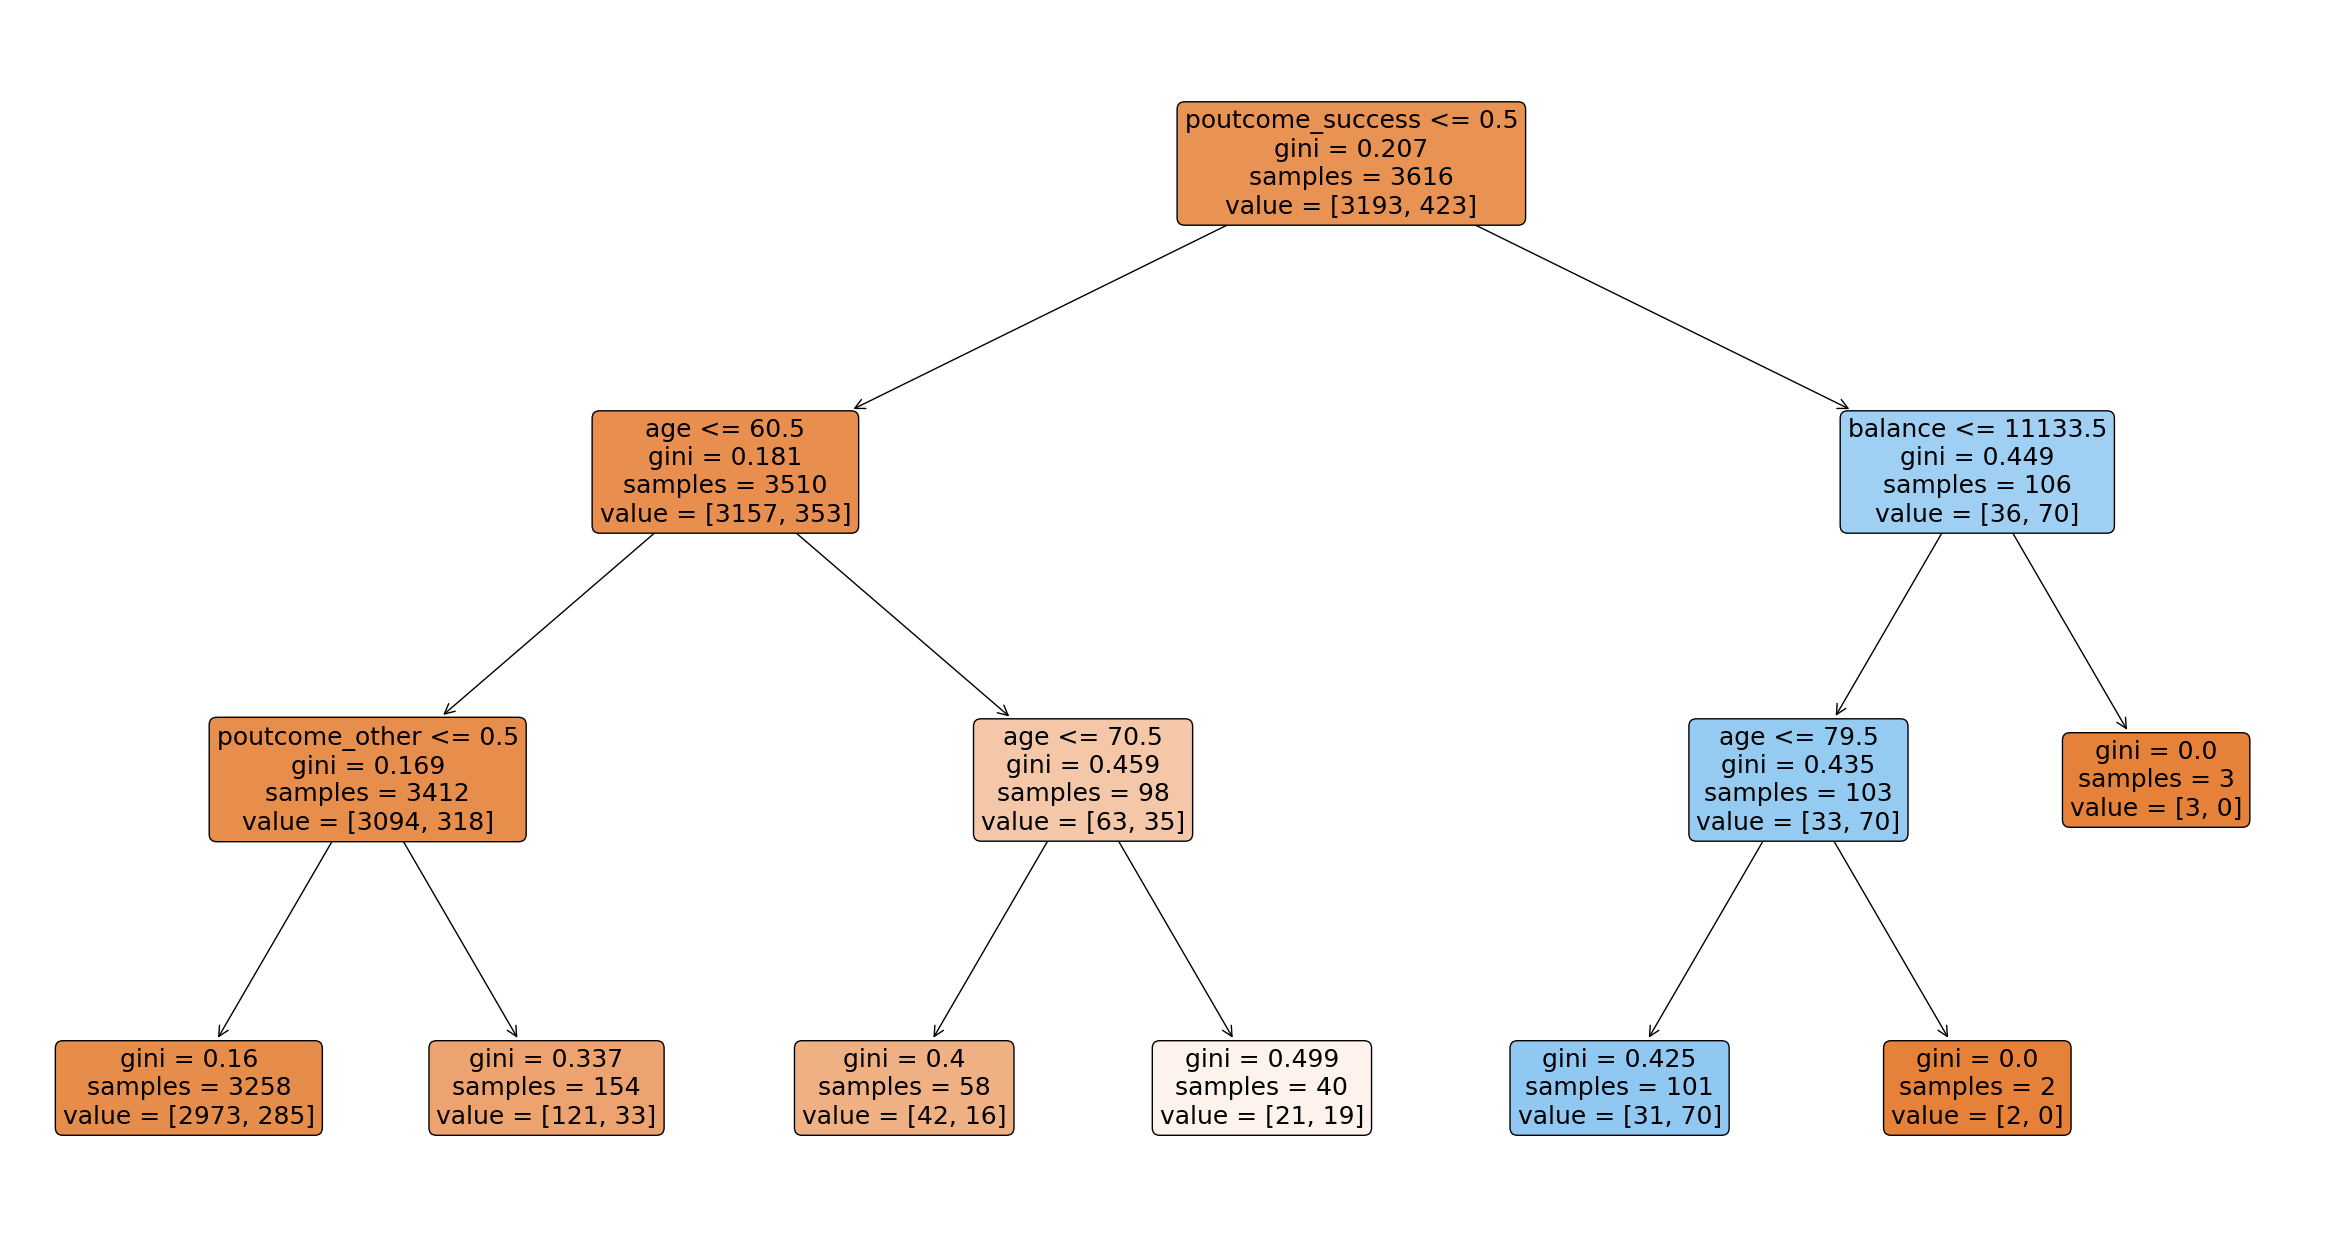

In [ ]:
plt.figure(figsize=(30, 16))
plot_tree(clf, filled=True, feature_names=x.columns.tolist(), rounded=True, fontsize=18)
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy

0.8961325966850828

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       807
           1       0.59      0.13      0.22        98

    accuracy                           0.90       905
   macro avg       0.75      0.56      0.58       905
weighted avg       0.87      0.90      0.87       905

